In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec

import os
from scipy.optimize import minimize

import clarsach
import xpysis

%matplotlib inline

In [2]:
DATA_DIR = os.environ['HOME'] + "/dev/clarsach/data"
mrk_dir  = DATA_DIR + "/tgcat/obs_15477_tgid_4679/"
mrk_file_list = [mrk_dir + order for order in ['heg_1.pha', 'heg_-1.pha']]

In [3]:
mrk421 = [xpysis.Spectrum(ff) for ff in mrk_file_list]

In [4]:
heg_stack = xpysis.Spectrum(mrk_file_list[0])
xpysis.stack_spectra(heg_stack, mrk421)

Cannot find exposure keyword from ARF, using PHA file
Cannot find exposure keyword from ARF, using PHA file


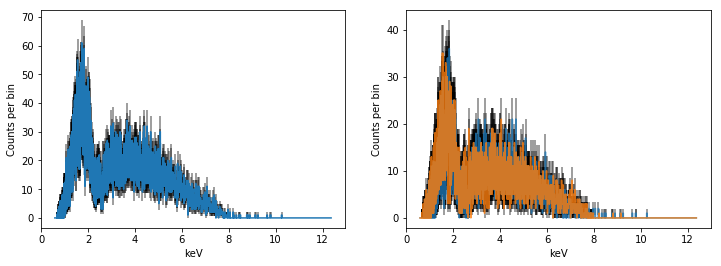

In [5]:
fig = plt.figure(figsize=(12,4))

ax0 = plt.subplot(121)
xpysis.plot_counts(ax0, heg_stack)

ax1 = plt.subplot(122)
for s in mrk421:
    xpysis.plot_counts(ax1, s, alpha=0.8)

In [6]:
for s in mrk421:
    print(s.exposure)

14409.8504245
14409.8504245


In [7]:
print(heg_stack.exposure)

28819.7008489


In [8]:
## I'm going to group all my data just to make it easier to read
MC = 10.0
xpysis.group_mincounts(mrk421[0], MC)
xpysis.group_mincounts(mrk421[1], MC)
xpysis.group_mincounts(heg_stack, MC)

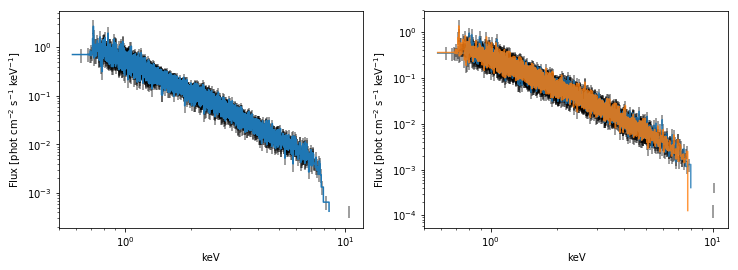

In [9]:
fig = plt.figure(figsize=(12,4))

ax0 = plt.subplot(121)
xpysis.plot_unfold(ax0, heg_stack)
ax0.set_xscale('log')
ax0.set_yscale('log')

ax1 = plt.subplot(122)
for s in mrk421:
    xpysis.plot_unfold(ax1, s, alpha=0.8)
ax1.set_xscale('log')
ax1.set_yscale('log')

In [10]:
## Just trying to make sure that nothing in the mrk421 spectra list changed
## The following calls should all return "False"
print(all(heg_stack.counts == mrk421[0].counts))
print(all(heg_stack.counts == mrk421[1].counts))
print(all(mrk421[0].counts == mrk421[1].counts))

False
False
False
